In [6]:
import os

os.getcwd()
os.chdir('C:\\Users\\barla\\OneDrive\\Desktop\\Academia\\Data Science and Economics\\Python projects\\Data Visualization')
os.getcwd()

'C:\\Users\\barla\\OneDrive\\Desktop\\Academia\\Data Science and Economics\\Python projects\\Data Visualization'

In [9]:
import pandas as pd

df= pd.read_excel('Flight.xlsx')



In [12]:
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,time_hour
0,5170.0,515,20.0,8300.0,819,110.0,UA,1545,N14228,EWR,IAH,1400,2013-01-01 05:00:00
1,5330.0,529,40.0,8500.0,830,200.0,UA,1714,N24211,LGA,IAH,1416,2013-01-01 05:00:00
2,5420.0,540,20.0,9230.0,850,330.0,AA,1141,N619AA,JFK,MIA,1089,2013-01-01 05:00:00
3,5440.0,545,-10.0,10040.0,1022,-180.0,B6,725,N804JB,JFK,BQN,1576,2013-01-01 05:00:00
4,5540.0,600,-60.0,8120.0,837,-250.0,DL,461,N668DN,LGA,ATL,762,2013-01-01 06:00:00


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [15]:
#to have a nicer visualization, I enrich the data by creating some other columns.

df['time_hour']= pd.to_datetime(df['time_hour'])
df['month']= df['time_hour'].dt.month
df['day']=df['time_hour'].dt.day
df['hour']=df['time_hour'].dt.hour
df['day of_week']= df['time_hour'].dt.dayofweek
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,time_hour,month,day,hour,day of_week
0,5170.0,515,20.0,8300.0,819,110.0,UA,1545,N14228,EWR,IAH,1400,2013-01-01 05:00:00,1,1,5,1
1,5330.0,529,40.0,8500.0,830,200.0,UA,1714,N24211,LGA,IAH,1416,2013-01-01 05:00:00,1,1,5,1
2,5420.0,540,20.0,9230.0,850,330.0,AA,1141,N619AA,JFK,MIA,1089,2013-01-01 05:00:00,1,1,5,1
3,5440.0,545,-10.0,10040.0,1022,-180.0,B6,725,N804JB,JFK,BQN,1576,2013-01-01 05:00:00,1,1,5,1
4,5540.0,600,-60.0,8120.0,837,-250.0,DL,461,N668DN,LGA,ATL,762,2013-01-01 06:00:00,1,1,6,1


<function matplotlib.pyplot.show(close=None, block=None)>

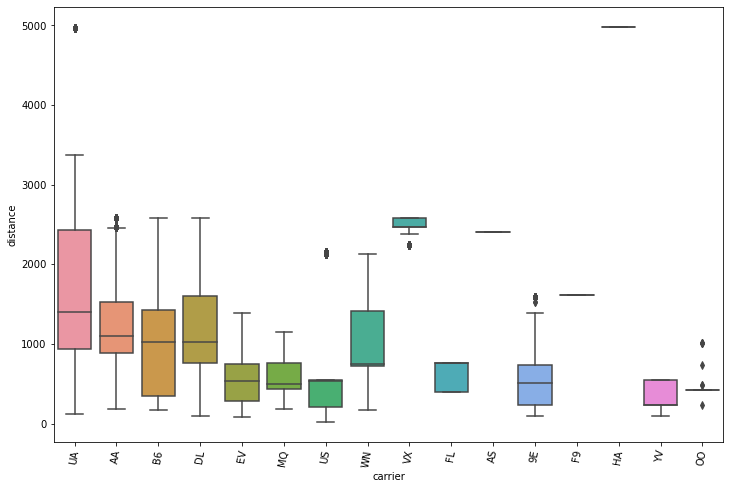

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='carrier', y='distance', data=df)
plt.xticks(rotation=80)
plt.show

# The company UA has the biggest variance in terms of distance. It has many short and long distance flights while the others
# in general clustered around a certain distance.

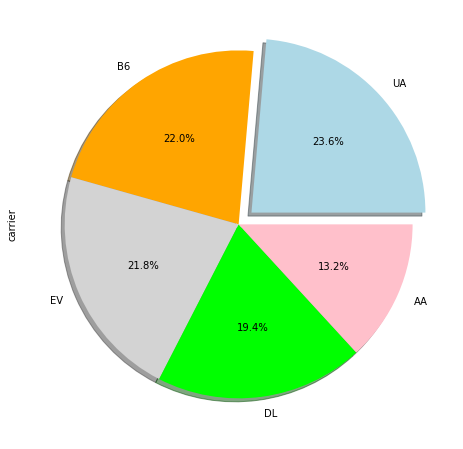

In [31]:
plt.figure(figsize=(8,8))

explode=(0.1,0,0,0,0)
colors=['lightblue', 'orange','lightgrey','lime','pink']
df.carrier.value_counts()[df.carrier.value_counts()>30000].plot.pie(autopct='%1.1f%%',shadow=True,
                                                                   explode=explode,colors=colors)
plt.show()


# five companies having more than 30.000 flights. UA has the highest number of flights, followed by B6.



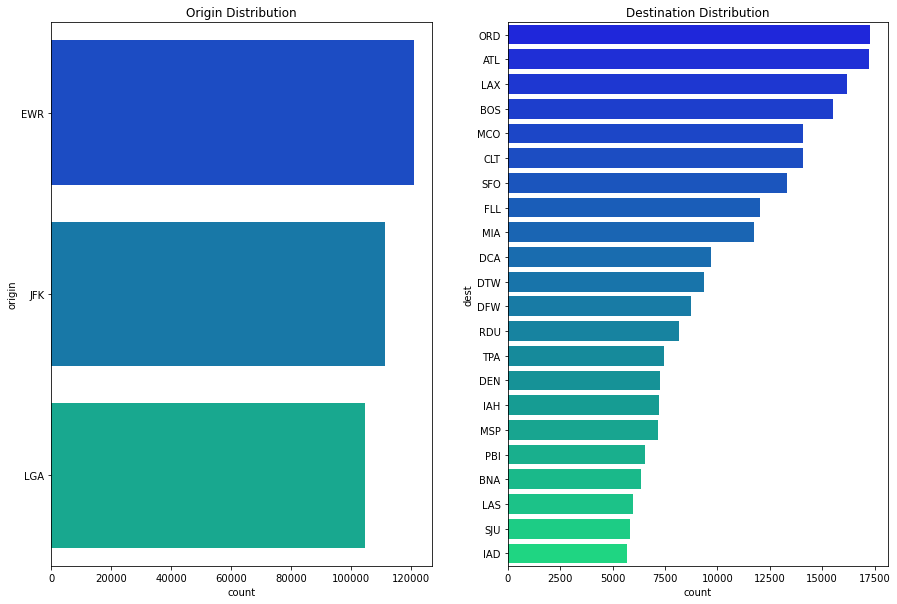

In [39]:
f, ax= plt.subplots(1,2,figsize=(15,10))

sns.countplot(y=df.origin, order=df.origin.value_counts().index,
              ax=ax[0], palette = 'winter')
ax[0].set_title('Origin Distribution')

sns.countplot(y=df.dest, order= df.dest.value_counts()[df.dest.value_counts()>5000].index,
              ax=ax[1], palette= 'winter')
ax[1].set_title('Destination Distribution')

plt.show()

# Here, I'm creating two plots showing origin and destination distribution respectively.
# EWR airport has the most flights going out while ORD airpot has the most ingoing fligts.
# For the destination distribution, I filtered it to be over 5000. So, it displays only the airports which have more than 5000


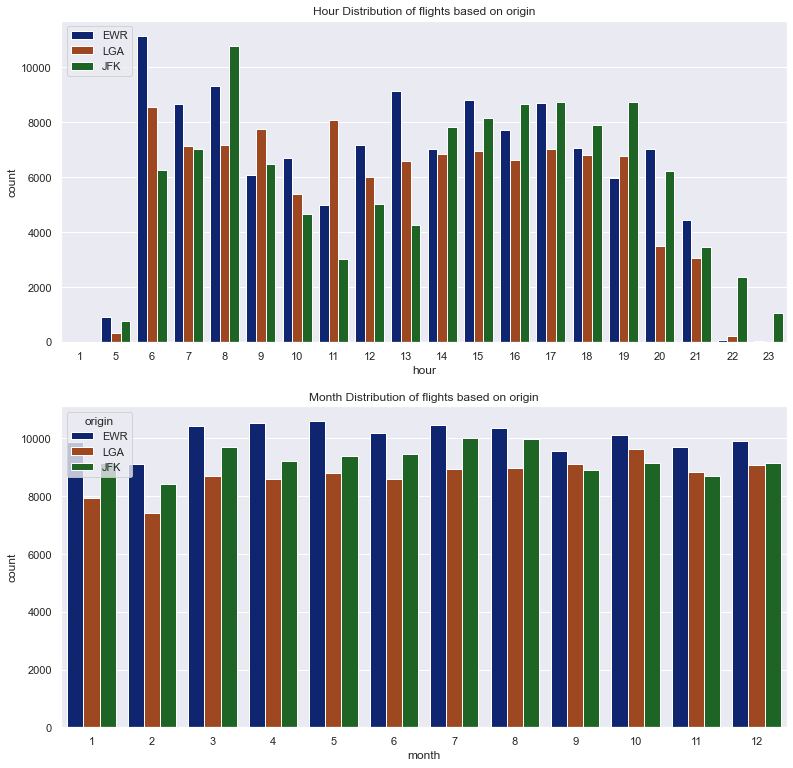

In [44]:
f, ax=plt.subplots(2,1, figsize=(13,13))
sns.set()

ax[0].set_title('Hour Distribution of flights based on origin')
sns.countplot(x='hour', hue='origin', data=df, ax=ax[0],palette='dark')
ax[0].legend(loc='upper left')

ax[1].set_title('Month Distribution of flights based on origin')
sns.countplot(x='month',hue='origin',data=df,ax=ax[1],palette='dark')

plt.subplots_adjust(hspace=0.2)
plt.show()

#As the titles suggests, we have numbers of flights based on origin/hour and based on origin/months.
#In EWR and LGA airport, most of the flights take off at around 6 while in JFK most of them takes off at around 8.

#In each airport, througout the year, the density of flights do not really vary a lot, there are just small differences.
#The busiest month for EWR is the may, for JFK is the august while for LGA is november. We do not have enough information to
#comment on these differences but there might be price differences causing it.


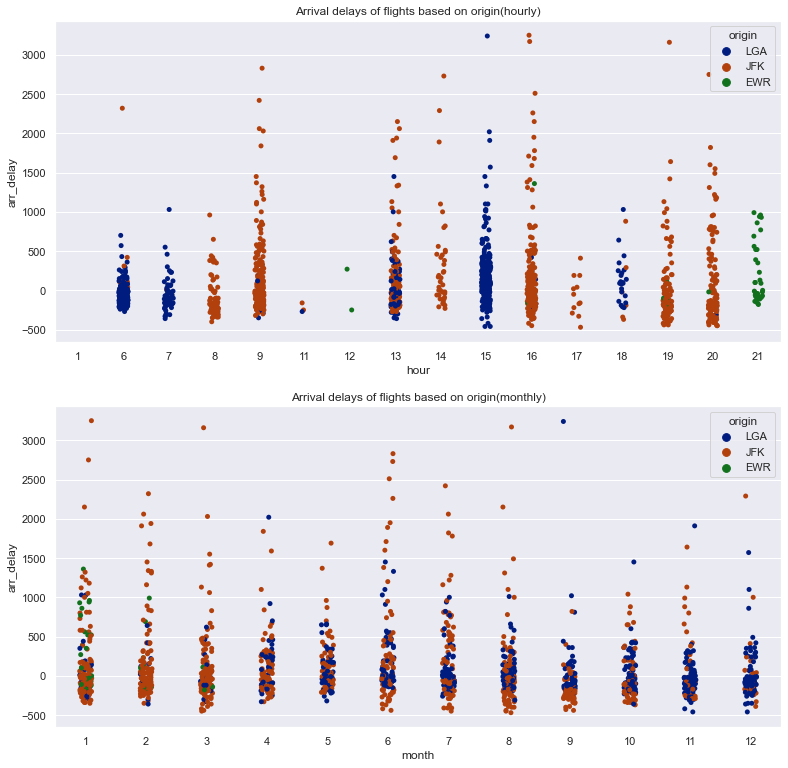

In [54]:
#Now let's have a strip-plot

f,ax=plt.subplots(2,1,figsize=(13,13))
sns.set()

df1=df[(df.distance)<100]# filtering those whose distance are lower than 100 miles.

ax[0].set_title('Arrival delays of flights based on origin(hourly)')

sns.stripplot(x='hour', y='arr_delay', hue='origin',data=df1, ax= ax[0], jitter=True, palette='dark')

ax[1].set_title('Arrival delays of flights based on origin(monthly)')

sns.stripplot(x='month',y='arr_delay',hue='origin',data=df1,ax=ax[1],jitter=True,palette='dark')

plt.subplots_adjust(hspace=0.2)

plt.show()



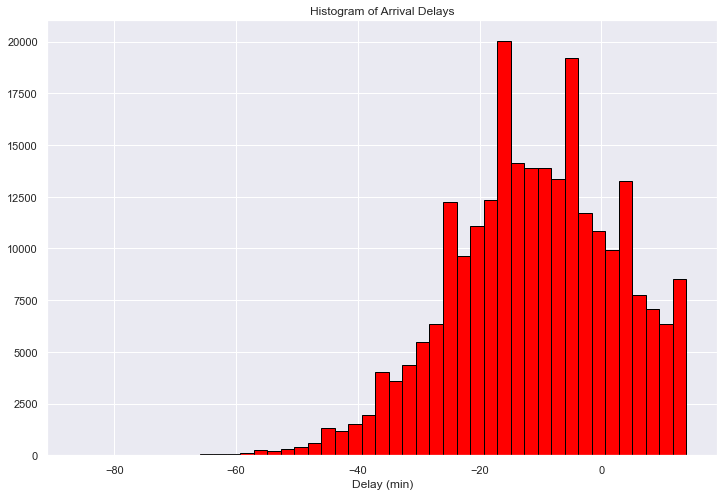

In [85]:
plt.figure(figsize=(12,8))
df1= df [ df.arr_delay < 150]
df1['arr_delay']=df['arr_delay'].div(10)


plt.hist(df1.arr_delay, bins = int(180/4), edgecolor='black', color = 'red')
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.show()

#there are more flights arriving earlier than they were supposed to.

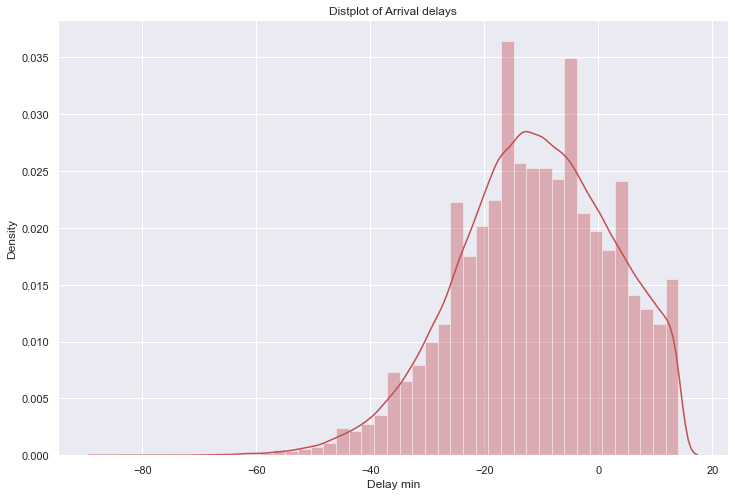

In [87]:
plt.figure(figsize=(12,8))
sns.distplot(df1['arr_delay'],bins=45,color='r')
plt.title('Distplot of Arrival delays')
plt.xlabel('Delay min')
plt.show()

0         1400
1         1416
5          719
12        2475
13        2565
          ... 
336723     937
336728     200
336737    1400
336755     200
336762    2565
Name: distance, Length: 58665, dtype: int64

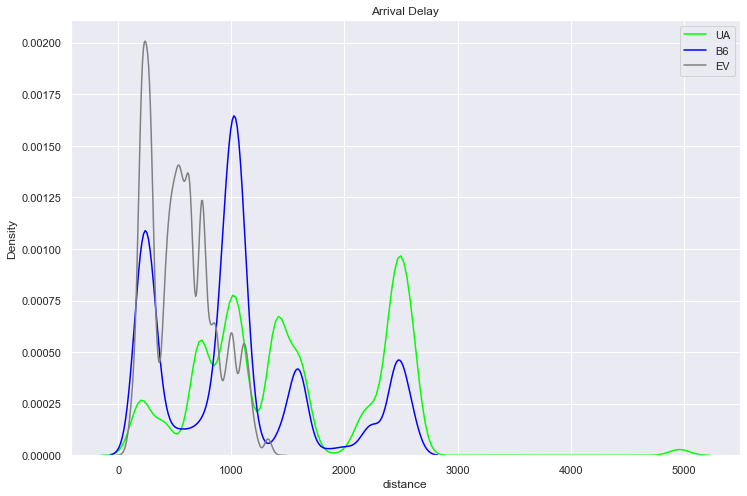

In [103]:
plt.figure(figsize=(12,8))

sns.kdeplot(df[(df.carrier=='UA')].distance,color='lime',label='UA')

sns.kdeplot(df[(df.carrier=='B6')].distance, color='blue', label='B6')

sns.kdeplot (df[(df.carrier=='EV')].distance, color='grey', label='EV')
plt.legend()

plt.title('Arrival Delay')

plt.show()

#For the company EV, the delays generally increase if the flight is a relatively short distance one.
# A weird result comes with B6 because if the flight distance is around 1000 miles, they have the highest delays.
#For UA, it seems like as the distance increases and so the delays.

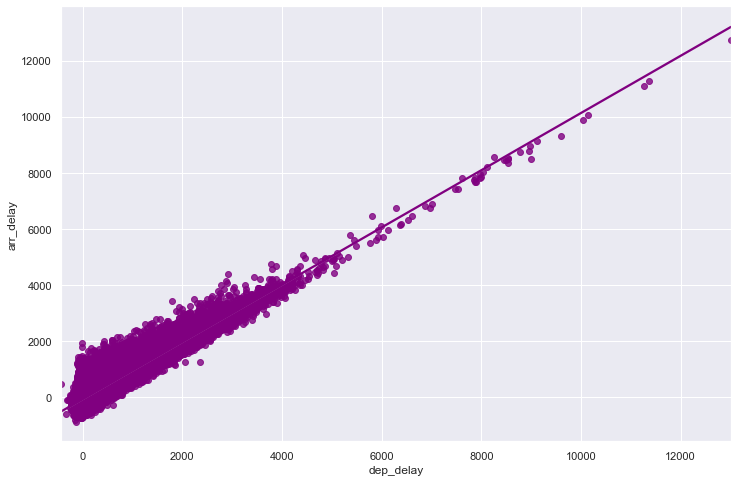

In [102]:
plt.figure(figsize=(12,8))
sns.regplot(x=df['dep_delay'], y=df['arr_delay'], color='purple')
plt.show()

#it seems like there is a linear relationship between departure and arrival delays which is actually very intiutive.
#So, if departure has a delay, then the arrival is likely to have a delay as well.